Starting with the library being used sklearn linear regression model because the numbers we are working with will probably create some sort of linear model
because as hp goes up 0-60 will go down and as weight goes up 0-60 will go down etc

In [91]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

this was to remove unneeded data from the csv and exporting it to another csv (keeping quarter mile incase I want to be able to calculate quarter mile too)

In [111]:
cardata=pd.read_csv("cars.csv")
cardata2=cardata[["weight","horsepower","torque","transmission","body style","drive train","quarter mile","0-60"]]
cardata2.to_csv("car0-60dataimportantvalues.csv",index=False)
cardata2.head()

,weight,horsepower,torque,transmission,body style,drive train,quarter mile,0-60
0,2524.0,450.0,600.0,2,0,2,15.2 s @ 107.5 mph,5.4
1,2222.0,340.0,800.0,2,0,2,14.9 s @ 99.4 mph,5.9
2,2454.0,310.0,410.0,2,0,2,15.7 s @ 89.0 mph,7.5
3,2439.0,224.0,500.0,2,0,2,15.9 s @ 84.5 mph,7.8
4,2045.0,286.0,600.0,2,0,2,14.1 s @ 94.8 mph,5.8


key: transmission: cvt:0, manual:1 , conventional auto:2, DCT:3, sequential:4

key: bodystyle: suv:0 Van:1 compact:2 convertible:3 wagon:4 saloon:5 coupe:6

key: drivetrain: FWD: 0 RWD:1 AWD:2
as seen in the graph below taking into account of hp as x value and 0-60 as a y value the graph clearly follows a negative exponential function
important info
torque is in NM
weight is in kg

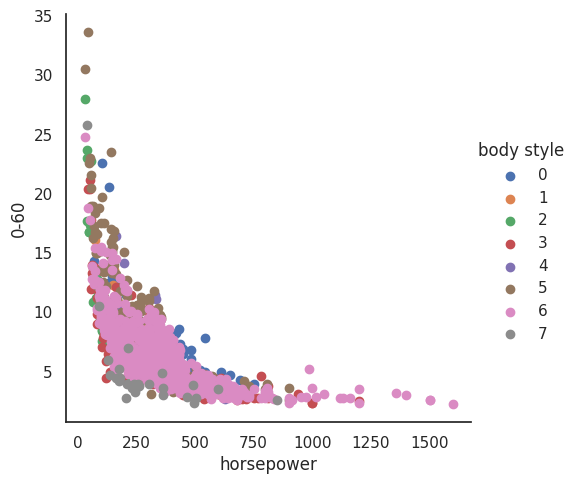

In [112]:
cardata=pd.read_csv("car0-60dataimportantvalues.csv")
sns.FacetGrid(cardata, hue="body style", height=5).map(plt.scatter,"horsepower","0-60").add_legend()

after trying linear regression, decision tree, and random forest the random forest seems to get the highest accuracy at about ~80% accuracy

In [119]:
train, test= train_test_split(cardata,test_size=0.2)
x_train=train[["horsepower","torque","body style","transmission","drive train","weight"]]
y_train=train[["0-60"]]
x_test=test[["horsepower","torque","body style","transmission","drive train","weight"]]
y_test=test[["0-60"]]
model= RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(x_train,y_train)
sample_car = pd.DataFrame({
    'horsepower': [320],
    'torque': [420],
    'body style': [2],
    'transmission': [3],
    'drive train': [2],
    'weight': [1476]
                   # Torque in lb-f               # Transmission type (1 for automatic, 2 for manua             # Body style (e.g., 0 for coupe, 1 for sedan, etc.)
})
print(model.predict(sample_car))
model.score(x_test,y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[4.65472549]


0.8796368766625751